In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Let's Do some EDA on Data

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
# Set the path to the dataset files
dataset_path = '/kaggle/input/fashion-product-images-dataset/fashion-dataset'

# Load the style.csv file
df = pd.read_csv(dataset_path + '/styles.csv', on_bad_lines='skip')
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [26]:
# Convert 'id' column to string data type and modify to include the image file extension
df['id'] = df['id'].astype(str) + '.jpg'
df.head(5)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970.jpg,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386.jpg,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263.jpg,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379.jpg,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759.jpg,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [27]:
df.describe()


,year
count,44423.000000
mean,2012.806497
std,2.126480
min,2007.000000
25%,2011.000000
50%,2012.000000
75%,2015.000000
max,2019.000000


In [28]:
df.shape

(44424, 10)

In [29]:
df.dtypes

id                     object
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
dtype: object

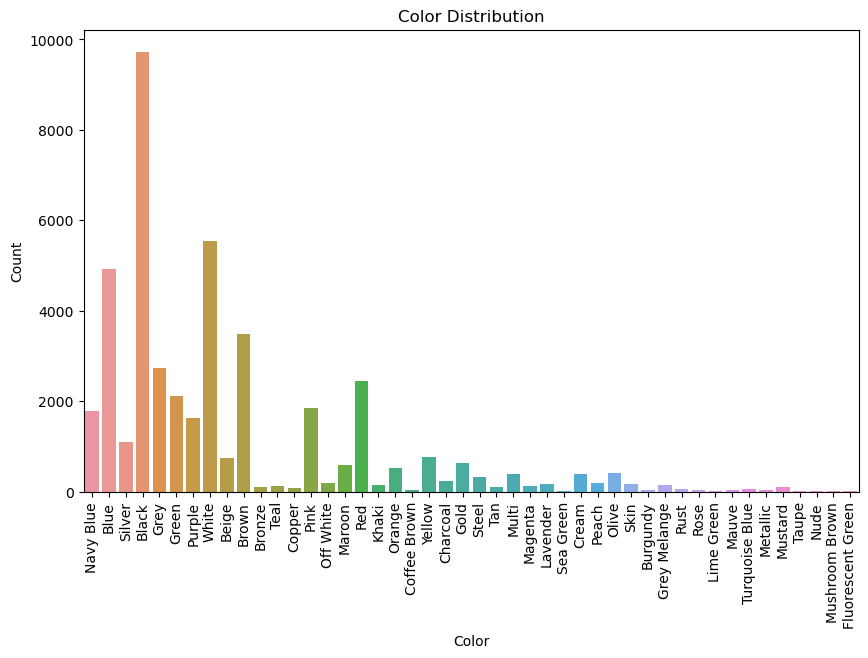

In [30]:
# Count the unique color values and their frequency
color_counts = df['baseColour'].value_counts()

# Plot the color distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='baseColour')
plt.xticks(rotation=90)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Color Distribution')
plt.show()


### Here we only have year column 

/tmp/ipykernel_32/3219018880.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numeric_attributes.corr()


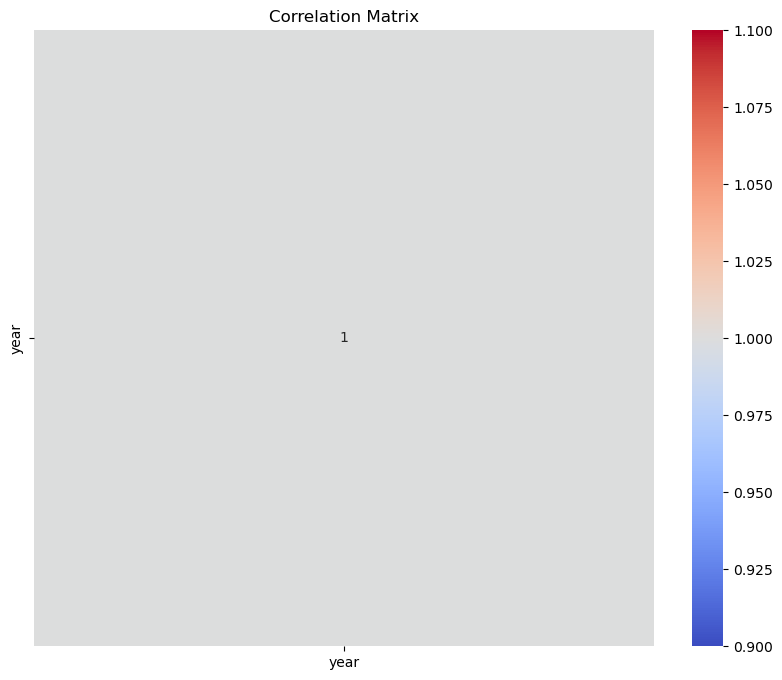

In [31]:
# Calculate pairwise correlations between numeric attributes
numeric_attributes = df.select_dtypes(include=['object', 'float64'])
correlation_matrix = numeric_attributes.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


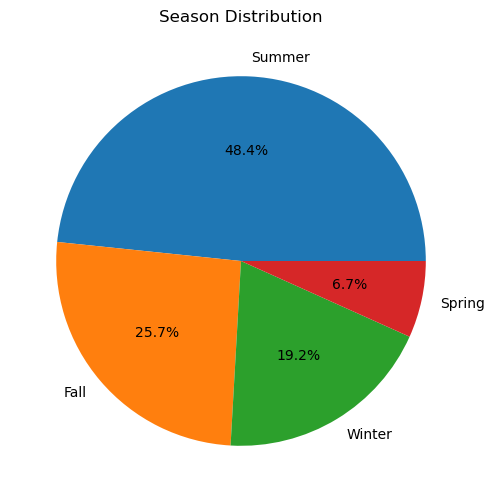

In [32]:
import matplotlib.pyplot as plt

# Count the occurrences of each season
season_counts = df['season'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(season_counts.values, labels=season_counts.index, autopct='%1.1f%%')
plt.title('Season Distribution')
plt.show()


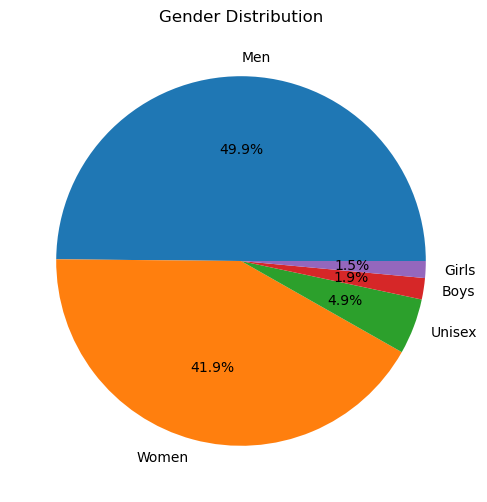

In [33]:
import matplotlib.pyplot as plt

# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()


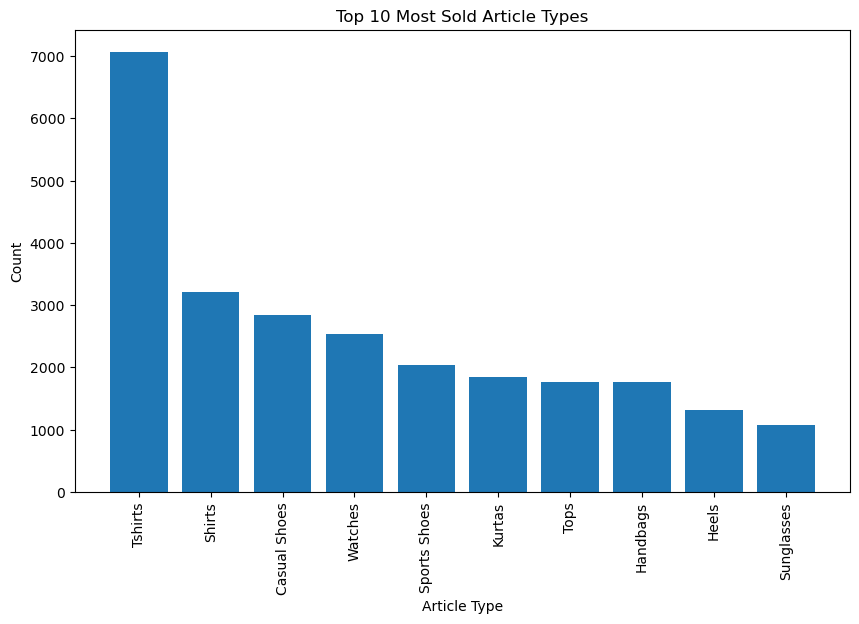

In [34]:
import matplotlib.pyplot as plt

# Count the occurrences of each type
type_counts = df['articleType'].value_counts()

# Select the top 10 article types
top_10_types = type_counts.head(10)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_types.index, top_10_types.values)
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.title('Top 10 Most Sold Article Types')
plt.xticks(rotation=90)
plt.show()


## Image Analysis

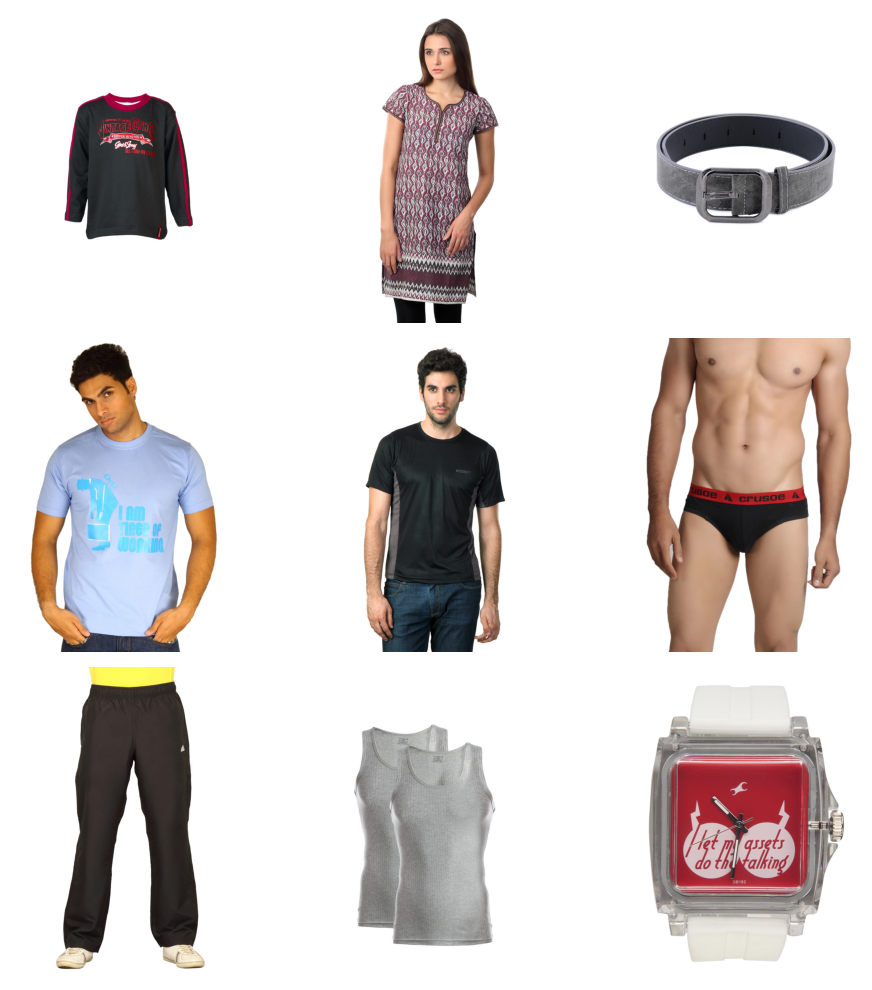

In [37]:
import cv2
import os
import matplotlib.pyplot as plt
# Define the image directory
image_dir = dataset_path +'/images'

# Display sample images
sample_ids = df['id'].sample(9)  # Assuming 'id' column contains image IDs
plt.figure(figsize=(10, 10))
for i, image_id in enumerate(sample_ids):
    image_path = os.path.join(image_dir, image_id)  # Assuming images have '.jpg' extension
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()


### Image Quality Analysis:

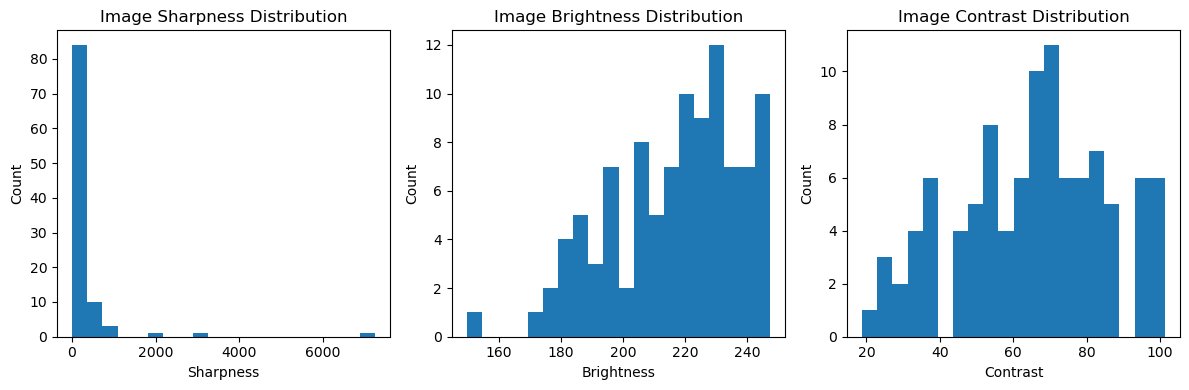

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_sharpness(image):
    # Calculate image sharpness using Laplacian operator
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sharpness = cv2.Laplacian(gray, cv2.CV_64F).var()
    return sharpness

def calculate_brightness(image):
    # Calculate image brightness as the average pixel value
    brightness = np.mean(image)
    return brightness

def calculate_contrast(image):
    # Calculate image contrast as the standard deviation of pixel values
    contrast = np.std(image)
    return contrast

# Iterate over the images
sharpness_scores = []
brightness_scores = []
contrast_scores = []

sample_ids = df['id'].sample(100)
for i, image_id in enumerate(sample_ids):
    # Load the image
    image_path = os.path.join(image_dir, image_id)
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue
    # Calculate image quality metrics
    sharpness = calculate_sharpness(image)
    brightness = calculate_brightness(image)
    contrast = calculate_contrast(image)
    
    # Append the scores to the lists
    sharpness_scores.append(sharpness)
    brightness_scores.append(brightness)
    contrast_scores.append(contrast)

# Plot histograms of image quality metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(sharpness_scores, bins=20)
plt.xlabel('Sharpness')
plt.ylabel('Count')
plt.title('Image Sharpness Distribution')

plt.subplot(1, 3, 2)
plt.hist(brightness_scores, bins=20)
plt.xlabel('Brightness')
plt.ylabel('Count')
plt.title('Image Brightness Distribution')

plt.subplot(1, 3, 3)
plt.hist(contrast_scores, bins=20)
plt.xlabel('Contrast')
plt.ylabel('Count')
plt.title('Image Contrast Distribution')

plt.tight_layout()
plt.show()


### Image Size Analysis:

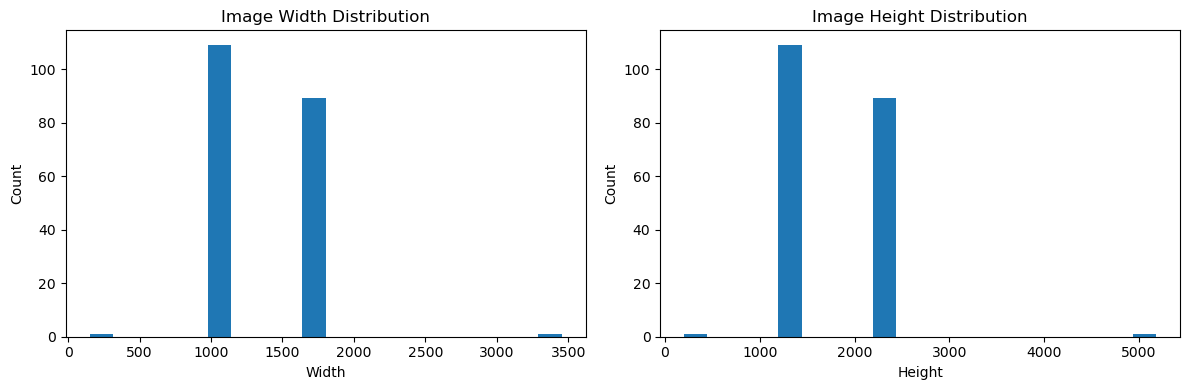

In [41]:
import cv2

# Calculate the image sizes
widths = []
heights = []

sample_ids = df['id'].sample(200)
for i, image_id in enumerate(sample_ids):
    # Load the image
    image_path = os.path.join(image_dir, image_id)
    image = cv2.imread(image_path)
    
    # Get the image size
    height, width, _ = image.shape
    widths.append(width)
    heights.append(height)

# Plot histograms of image widths and heights
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20)
plt.xlabel('Width')
plt.ylabel('Count')
plt.title('Image Width Distribution')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20)
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Image Height Distribution')

plt.tight_layout()
plt.show()
